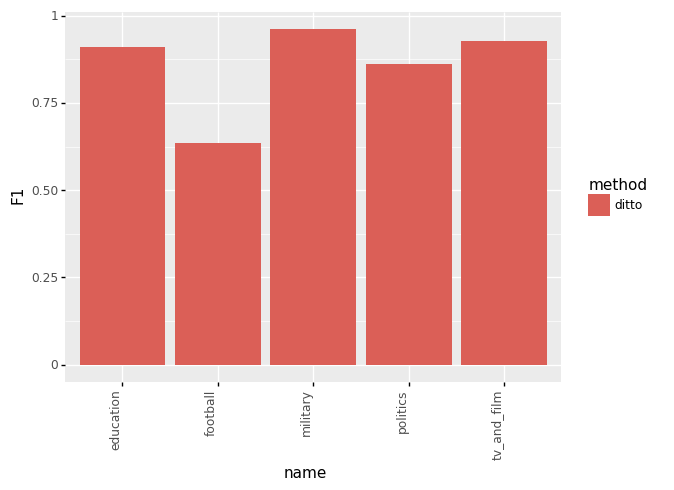

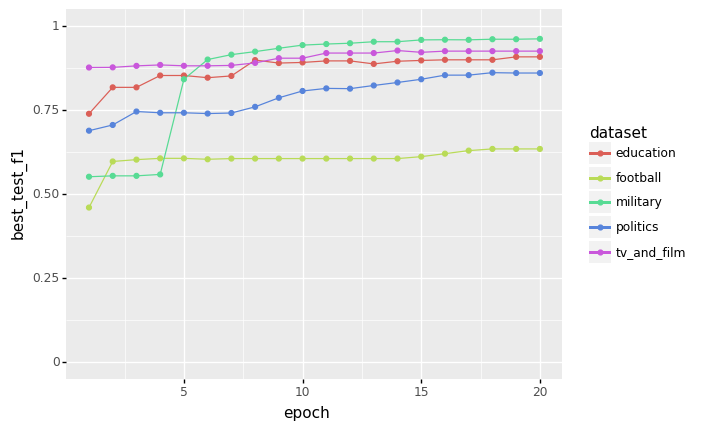

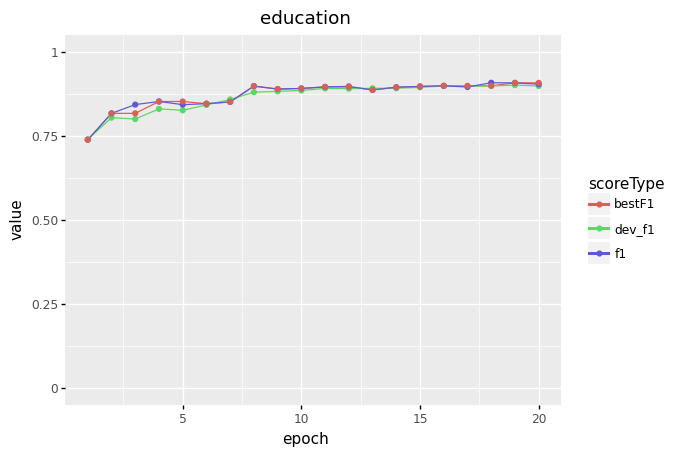

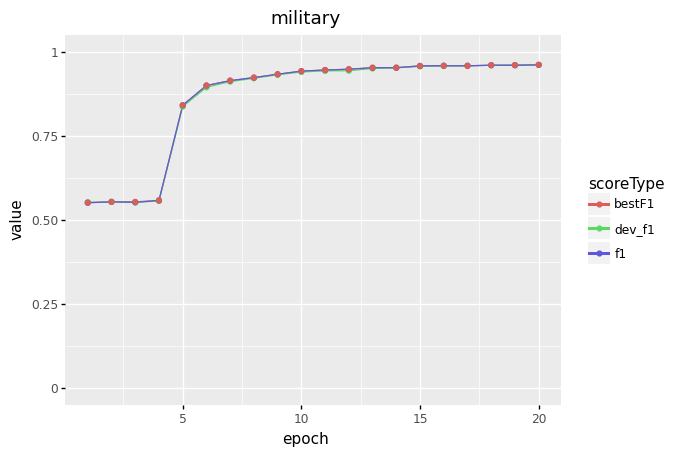

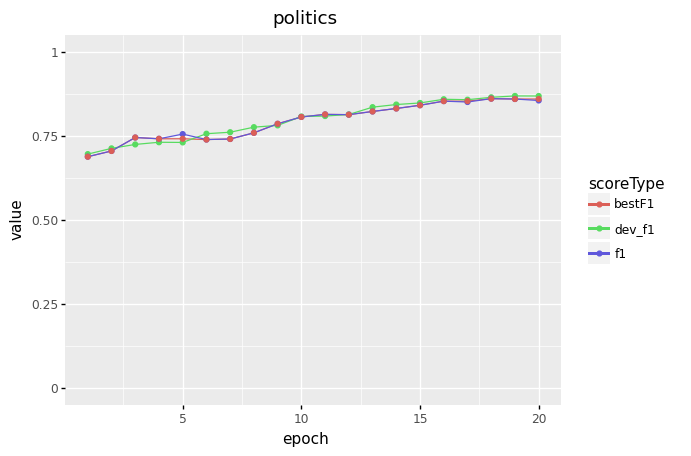

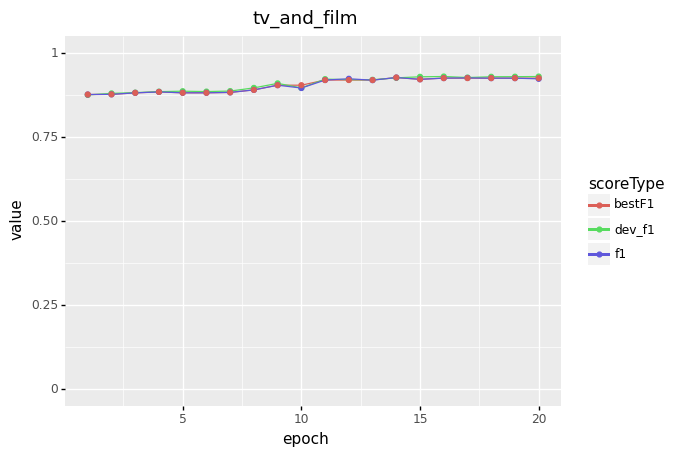

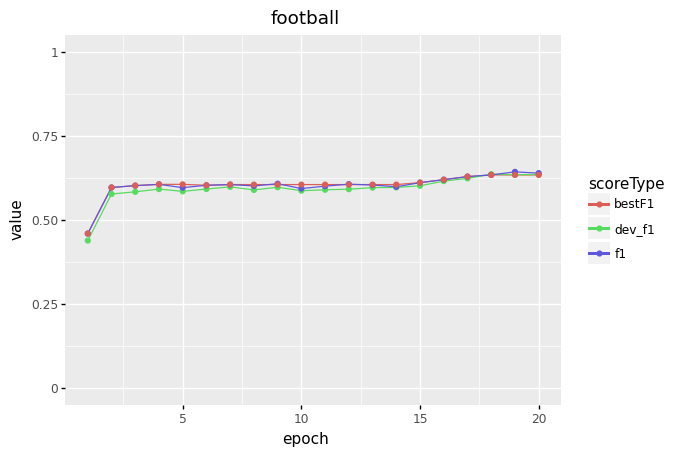

In [75]:
import pandas as pd
from plotnine import *
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, precision_recall_curve
import numpy as np



def readDittoDF(path,method):
    dittoDF = pd.read_csv(path)
    dittoDF["name"]=dittoDF["dataset"]
    dittoDF["F1"]=dittoDF["best_test_f1"]
    dittoDF["method"]=method
    return dittoDF

dittoDF = readDittoDF("localData/matching/dittoResults.csv","ditto")

dfPivoted = pd.read_csv("localData/matching/dittoResultsPivot.csv")

newDFToPlot = dittoDF
#print(ggplot(bestF1ScoreBased) + geom_point(aes(x='recall',y='Precision',color="name")))
plot = ggplot(newDFToPlot,aes(x = 'name',y='F1',fill='method')) + geom_col(position=position_dodge()) + theme(axis_text_x = element_text(angle=90, hjust=1))
print(plot)

plot = ggplot(dittoDF,aes(x = 'epoch',y='best_test_f1',color='dataset')) + geom_line() + geom_point()  + xlim(1, 20) + ylim(0, 1)
print(plot)

datasets = dittoDF["dataset"].unique()
for ds in datasets:
    dfFiltered = dfPivoted[dfPivoted["dataset"]==ds]
    #print(dfFiltered)
    plot = ggplot(dfFiltered,aes(x = 'epoch',y='value',color='scoreType')) + geom_line() +  geom_point() + ylim(0, 1) + xlim(1, 20) + ggtitle(ds)
    print(plot)


politics 0.9066390041493776 0.8229755178907722 0.8627838104639685 0.71939736346516
education 0.9512195121951219 0.8694267515923567 0.9084858569051582 0.8694267515923567
tv_and_film 0.9589131875414182 0.8965303593556382 0.9266730707652899 0.9021065675340768
football 0.5177615571776155 0.7837937384898711 0.6235897435897436 0.009944751381215469
military 0.9735470941883767 0.9549832907411048 0.9641758459859084 0.9646156870454099
Macro-F1 0.8571416655420137
Macro-F1 [0.71939736346516, 0.8694267515923567, 0.9021065675340768, 0.009944751381215469, 0.9646156870454099] 0.6930982242036438
False
count     19524
unique        5
top          FO
freq       6726
Name: dataset, dtype: object


/tmp/ipykernel_67285/944319426.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_67285/944319426.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_67285/944319426.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_67285/944319426.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_67285/944319426.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.8/dist-packages

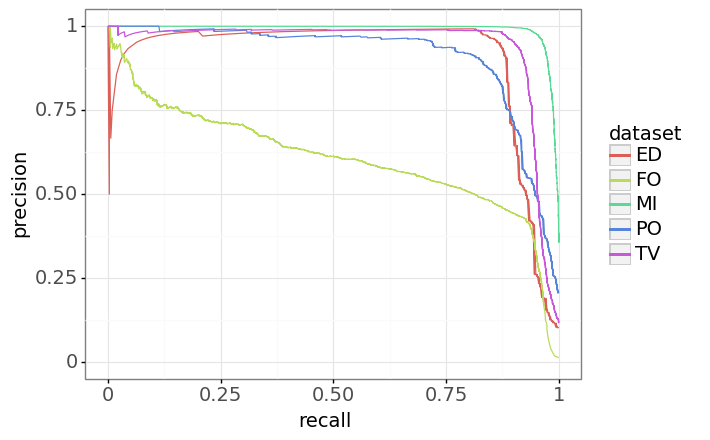

In [85]:
import role_matching.EvaluationHelperMethods as ehm
dsNames = ["politics", "education", "tv_and_film", "football","military"]

df = pd.DataFrame()
f1Scores = []
targetPrecision = 0.95
targetPrecisionRecalls = []
for dsName in dsNames:
    curDF = pd.read_csv("localData/dittoResults/"+dsName + ".csv")
    curDF["dataset"] = dsName
    p,r,t = precision_recall_curve(curDF["isTrueMatch"],curDF["normalizedScore"])
    f1 = (2*p*r) / (p + r)
    tNEw = list(t) + [1.0]
    curPRdf = pd.DataFrame({"precision":p,"recall":r,"f1":f1,"threshold":tNEw,"dataset":dsName})
    #print(len(curDF['matchConfidence'].unique()),len(curDF.index))
    #print(curDF[curDF['matchConfidence']==0.9999698759401376])
    i = np.argmax(f1)
    f1Scores.append(f1[i])
    targetPrecisionI = np.argwhere(p>=targetPrecision)
    recallsForTargetPrecision = r[targetPrecisionI]
    recallForTargetPrecision = np.max(recallsForTargetPrecision)
    targetPrecisionRecalls.append(recallForTargetPrecision)
    print(dsName,p[i],r[i],f1[i],recallForTargetPrecision)
    sorted = curPRdf.sort_values(by="threshold",ascending=False)
    #print(sorted)
    #plot = ggplot(curPRdf,aes(x = 'recall',y='precision',color='dataset')) + geom_line() + geom_point()  + xlim(0, 1) + ylim(0, 1)
    #print(plot)
    df = df.append(curPRdf)
macroF1 = sum(f1Scores) / len(f1Scores)
macroRecall = sum(targetPrecisionRecalls) / len(targetPrecisionRecalls)
print("Macro-F1",macroF1)
print("Macro-F1",targetPrecisionRecalls,macroRecall)
ehm.addShortDataset(df)
df["dataset"]=df["datasetShort"]
print(df['dataset'].isnull().values.any())
print(df['dataset'].describe())
plot = ggplot(df,aes(x = 'recall',y='precision',color='dataset')) + geom_line()  + xlim(0, 1) + ylim(0, 1) + theme_bw() + theme(text=element_text(size=14))
plot.save("exportedPlots/prCurveMatching.png")
print(plot)

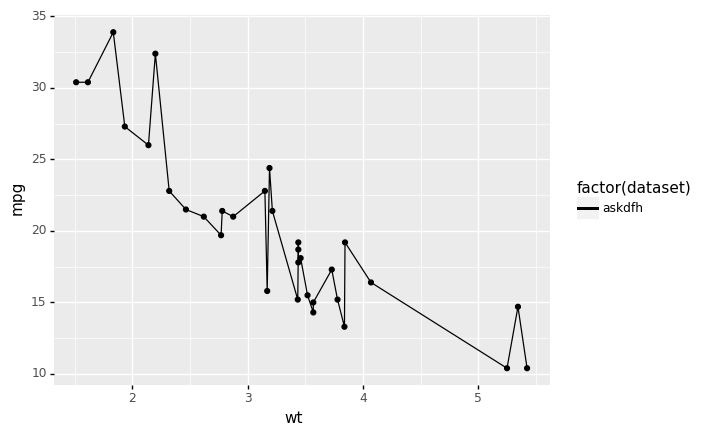

<ggplot: (8745116019375)>

In [84]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line
from plotnine.data import mtcars
mtcars['dataset'] = "askdfh"
(ggplot(mtcars, aes('wt', 'mpg', linetype='factor(dataset)'))
 + geom_point() + geom_line())